In [28]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [30]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [31]:
sum(city_data_df["type"]=="Suburban")

36

In [32]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [33]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [34]:
pyber_data_df = pd.merge(ride_data_df, city_data_df,on=["city", "city"])
pyber_data_df.tail(2)

,city,date,fare,ride_id,driver_count,type
2373,West Heather,2019-02-02 06:28:04,53.07,2462950442268,4,Rural
2374,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [35]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,Randallchester,2019-02-19 03:52:47,58.55,8004803682564,9,Rural
2252,Randallchester,2019-02-11 05:42:29,25.78,9010611749008,9,Rural
2253,Randallchester,2019-03-25 13:36:46,10.37,3216382725494,9,Rural
2254,Randallchester,2019-04-07 23:42:07,10.79,1615474447641,9,Rural


In [36]:
# Create the Rural city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,Barronchester,2019-05-05 04:03:11,30.38,2281522828169,11,Suburban
1627,Barronchester,2019-04-25 19:11:43,36.13,2660177707065,11,Suburban
1628,Barronchester,2019-03-31 06:05:30,44.24,1252888806772,11,Suburban
1629,Barronchester,2019-03-02 23:36:58,36.49,4031573980778,11,Suburban


In [37]:
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

NameError: name 'urban_cities_df' is not defined

In [38]:
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [39]:
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [40]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(['city']).mean()["fare"]
urban_avg_fare.head()

NameError: name 'urban_cities_df' is not defined

In [41]:
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [42]:
rural_avg_fare = rural_cities_df.groupby(['city']).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [43]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(['city']).mean()["driver_count"]
urban_driver_count.head()


NameError: name 'urban_cities_df' is not defined

In [44]:
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()["driver_count"]
suburban_driver_count.head()


city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [45]:
rural_driver_count = rural_cities_df.groupby(['city']).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [46]:
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10 * urban_driver_count, color="coral",
            edgecolor="black",
            linewidths=1,
            alpha=0.8, 
            label="Urban")
plt.title("Pyber Ride-Sharing Data(2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

NameError: name 'urban_ride_count' is not defined

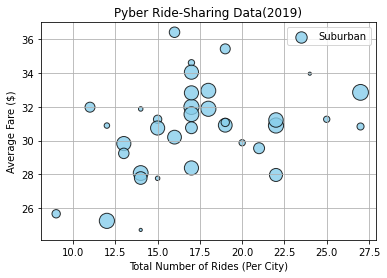

In [47]:
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10 * suburban_driver_count, color="skyblue",
            edgecolor="black",
            linewidths=1,
            alpha=0.8, 
            label="Suburban")
plt.title("Pyber Ride-Sharing Data(2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

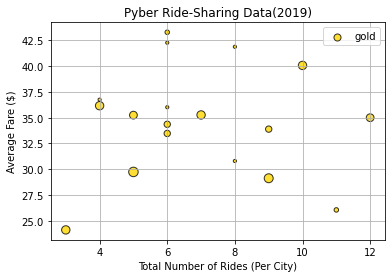

In [48]:
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10 * rural_driver_count, color="gold",
            edgecolor="black",
            linewidths=1,
            alpha=0.8, 
            label="gold")
plt.title("Pyber Ride-Sharing Data(2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

In [52]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.title("Pyber Ride-Sharing Data(2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()
# Show the plot

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="10")

#plt.savefig(analysis/Fig1.png")


NameError: name 'urban_ride_count' is not defined

In [53]:
# Get summary statistics.
urban_ride_count.describe()

NameError: name 'urban_ride_count' is not defined

In [54]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [55]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [56]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

NameError: name 'urban_ride_count' is not defined

In [57]:
suburban_ride_count.mode()

0    17
dtype: int64

In [58]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [59]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


NameError: name 'urban_ride_count' is not defined

In [ ]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")


In [ ]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for suburban trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_rural_ride_count}.")


In [ ]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()


In [60]:
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}.")

NameError: name 'urban_fares' is not defined

In [61]:
suburban_fares = suburban_cities_df["fare"]
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is ${mode_suburban_fares}.")

NameError: name 'mean_urban_fares' is not defined

In [62]:
rural_fares = rural_cities_df["fare"]
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is ${mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [63]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()


NameError: name 'urban_cities_df' is not defined

In [64]:
# Get the driver count data from the urban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    11
1627    11
1628    11
1629    11
Name: driver_count, dtype: int64

In [65]:
# Get the driver count data from the urban cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    9
2252    9
2253    9
2254    9
Name: driver_count, dtype: int64

NameError: name 'urban_ride_count' is not defined

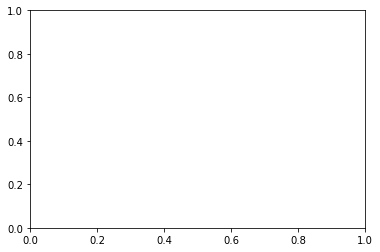

In [66]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()


In [67]:
urban_ride_count.describe()

NameError: name 'urban_ride_count' is not defined

In [68]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")

NameError: name 'urban_ride_count' is not defined

In [69]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")


NameError: name 'urban_ride_count' is not defined

NameError: name 'urban_fares' is not defined

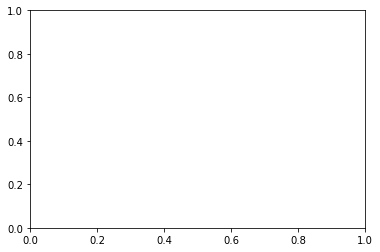

In [70]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()

print("Summary Statistics")
urban_fares.describe()


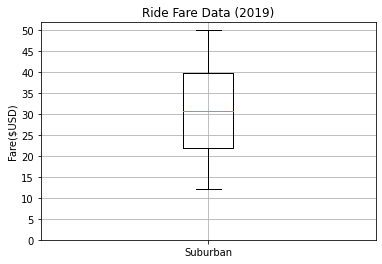

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [71]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()


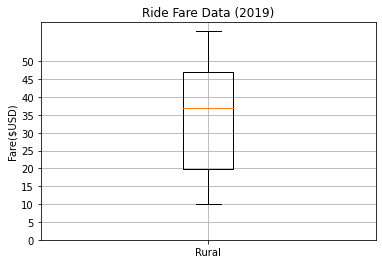

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [72]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

NameError: name 'urban_drivers' is not defined

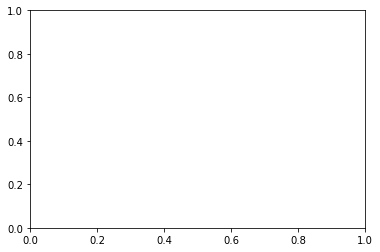

In [73]:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

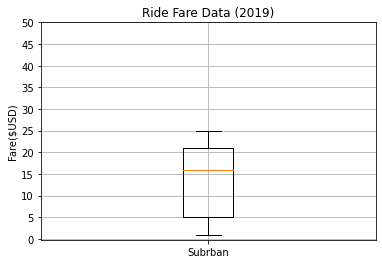

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [74]:
x_labels = ["Subrban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

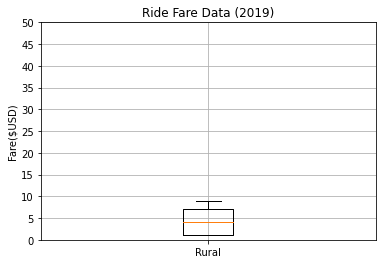

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [75]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

In [ ]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
driver_count_data = [urban_driver_count, suburban_driver_count, rural_driver_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")

In [ ]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")

In [ ]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

In [ ]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

In [ ]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents


In [ ]:
plt.pie(type_percents, labels= ["Rural", "Suburban", "Urban"],
        colors = ["gold", "lightskyblue","lightcoral"],
        explode = [0, 0, 0.1],
        autopct = '%1.1f%%',
        shadow = True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
plt.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")


In [ ]:
sum_ride_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_fares_by_type

In [ ]:
total_rides = pyber_data_df["ride_id"].count()
total_rides

In [ ]:
ride_type_percents = 100 * sum_ride_by_type / total_rides
ride_type_percents

In [ ]:
plt.pie(ride_type_percents, labels= ["Rural", "Suburban", "Urban"],
        colors = ["gold", "lightskyblue","lightcoral"],
        explode = [0, 0, 0.1],
        autopct = '%1.1f%%',
        shadow = True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
plt.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")

In [ ]:
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

In [ ]:
plt.pie(driver_type_percents, labels= ["Rural", "Suburban", "Urban"],
        colors = ["gold", "lightskyblue","lightcoral"],
        explode = [0, 0, 0.1],
        autopct = '%1.1f%%',
        shadow = True, startangle=150)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
plt.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")